In [2]:
import sys
from pandas import read_excel, DataFrame, melt, pivot_table
from matplotlib import pyplot as plt

In [13]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
origin = read_excel('C:/Users/Jihwan/01Class/수업data/unemployment_age.xlsx', index_col=[0,1])
origin

2000  2001  2002  2003  2004  ...  2018  2019  2020  2021  2022
시도별     연령계층별                                 ...                              
서울특별시   15-29세   8.1   8.4   8.2   8.8   8.9  ...  10.1   8.8   9.1   9.0   6.8
        30-59세   3.9   3.6   3.0   3.2   3.4  ...   3.5   3.2   3.3   3.6   2.4
        60세이상    2.9   1.9   2.3   1.9   2.1  ...   4.0   4.3   4.7   5.1   3.6
부산광역시   15-29세  12.1  10.7   7.6   9.0   9.9  ...   9.5   9.1  10.6   7.7   6.8
        30-59세   5.5   4.2   2.9   2.9   3.1  ...   3.2   2.4   2.9   2.4   2.2
        60세이상    5.3   3.6   2.1   1.5   1.0  ...   2.9   3.9   3.7   3.3   2.8
대구광역시   15-29세   9.1   9.8   9.2   9.8   8.6  ...  12.2   8.3   9.0   7.1   6.9
        30-59세   3.7   3.5   2.8   3.0   3.2  ...   2.9   2.9   3.0   2.8   2.1
        60세이상    0.7   1.2   1.4   2.2   1.6  ...   3.7   3.1   3.2   4.6   2.9
인천광역시   15-29세   8.2   8.2   7.9   8.8   8.3  ...   9.2   9.0   8.6   7.9   6.7
        30-59세   4.6   3.6   2.8   3.1   3.4  ...   2.9   3.1   3.5   2.8   2.4
        60세이상    3.8   2.5   2.8   2.2   3.2  ...   5.3   5.0   5.2   5.2   3.9
광주광역시   15-29세  12.0   9.4   7.6  10.8   9.5  ...   8.6   9.7   8.8   7.7   6.5
        30-59세   4.7   3.7   2.8   2.8   2.9  ...   2.8   2.5   2.8   2.5   2.1
        60세이상    2.4   1.5   0.9   1.0   0.7  ...   3.0   2.9   3.3   4.2   3.0
대전광역시   15-29세   9.3   9.2   7.8   7.0   9.3  ...  10.5   9.6   7.7   6.9   4.4
        30-59세   3.3   3.0   2.6   2.9   2.7  ...   2.9   2.9   3.5   2.2   1.7
        60세이상    1.3   2.1   1.3   0.9   1.9  ...   3.3   4.2   4.3   3.6   2.9
울산광역시   15-29세   8.3   7.6   5.0   7.5   8.0  ...   9.8   8.8  11.6   8.0   7.8
        30-59세   3.0   2.2   1.7   2.0   2.5  ...   3.3   3.1   2.8   2.4   2.2
        60세이상    3.5   2.6   2.5   1.1   1.0  ...   5.9   5.4   4.5   5.3   4.0
세종특별자치시 15-29세   0.0   0.0   0.0   0.0   0.0  ...   5.9   8.7   7.7   3.9   3.1
        30-59세   0.0   0.0   0.0   0.0   0.0  ...   1.6   1.7   1.8   1.7   1.7
        60세이상    0.0   0.0   0.0   0.0   0.0  ...   2.5   2.7   3.4   2.6   2.6
경기도     15-29세   6.2   5.8   4.9   7.3   7.6  ...   9.0   8.7   8.6   7.6   6.1
        30-59세   3.2   2.9   2.2   2.3   2.5  ...   2.7   2.7   3.0   2.6   2.0
        60세이상    2.7   1.9   1.7   1.7   2.5  ...   3.4   3.9   3.7   4.4   2.6
강원도     15-29세   5.7   4.5   4.8   5.9   6.4  ...   5.2   7.8   8.6   8.1   7.5
        30-59세   2.1   2.0   1.3   1.3   1.3  ...   2.0   2.1   2.5   2.3   1.9
        60세이상    0.5   0.5   0.2   0.5   0.2  ...   4.0   4.9   5.0   4.5   4.1
충청북도    15-29세   7.2   7.8   7.2   7.2   8.0  ...   7.0   8.0   8.1   6.0   5.5
        30-59세   3.0   2.5   1.5   2.5   1.7  ...   1.6   2.1   2.0   1.5   1.8
        60세이상    0.6   0.9   0.3   0.6   0.3  ...   1.6   2.5   3.3   2.8   2.3
충청남도    15-29세   7.2   8.7   6.9   7.6   6.6  ...   9.0   8.2   8.5   4.9   5.1
        30-59세   2.1   1.8   1.9   2.1   1.6  ...   1.9   2.1   2.7   2.0   1.8
        60세이상    0.4   0.3   0.6   0.7   0.5  ...   2.2   1.3   2.4   1.5   2.0
전라북도    15-29세   9.0   9.7   8.3   8.3   9.5  ...  10.0   9.3   9.1   5.9   6.6
        30-59세   2.0   1.9   1.5   1.8   1.7  ...   2.0   2.1   1.8   1.5   1.7
        60세이상    0.1   0.1   0.0   0.3   0.3  ...   0.9   1.0   1.3   2.2   2.1
전라남도    15-29세   8.9   8.1   7.3   7.5   8.1  ...  10.0   9.9   7.0   6.9   6.3
        30-59세   2.8   2.6   1.8   1.9   2.0  ...   2.1   1.7   1.6   1.5   1.7
        60세이상    0.4   0.5   0.2   0.1   0.3  ...   1.4   1.6   2.2   2.5   1.9
경상북도    15-29세   8.8   7.0   5.8   6.6   7.4  ...  12.0  11.2  10.5   8.0   7.4
        30-59세   2.4   2.0   1.7   1.5   1.9  ...   3.1   2.7   3.2   2.6   1.6
        60세이상    0.5   0.3   0.3   0.3   0.4  ...   3.0   3.3   3.3   2.5   2.2
경상남도    15-29세   5.9   6.4   6.0   5.8   5.9  ...   9.6  10.3  10.1   8.5   6.9
        30-59세   3.3   2.8   1.9   2.0   1.8  ...   2.1   2.9   3.4   3.6   2.8
        60세이상    0.5   0.7   0.3   0.6   0.7  ...   2.0   2.8   2.8   3.2   3.0
제주도     15-29세  

In [6]:
df = origin.reset_index()
df.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,7.6,8.1,8.4,8.3,8.3,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,3.0,3.7,3.7,3.6,3.2,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,1.8,2.3,4.3,4.1,3.7,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,8.1,9.0,8.9,8.8,8.7,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,2.9,3.5,2.6,2.7,3.0,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


In [8]:
df2 = melt(df,id_vars=['시도별','연령계층별'],var_name='년도',value_name='실업률')
df2

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
...,...,...,...,...
1168,경상남도,30-59세,2022,2.8
1169,경상남도,60세이상,2022,3.0
1170,제주도,15-29세,2022,5.1
1171,제주도,30-59세,2022,1.6


In [10]:
tdf = df2[['년도','실업률']].groupby(['년도']).mean()
tdf

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


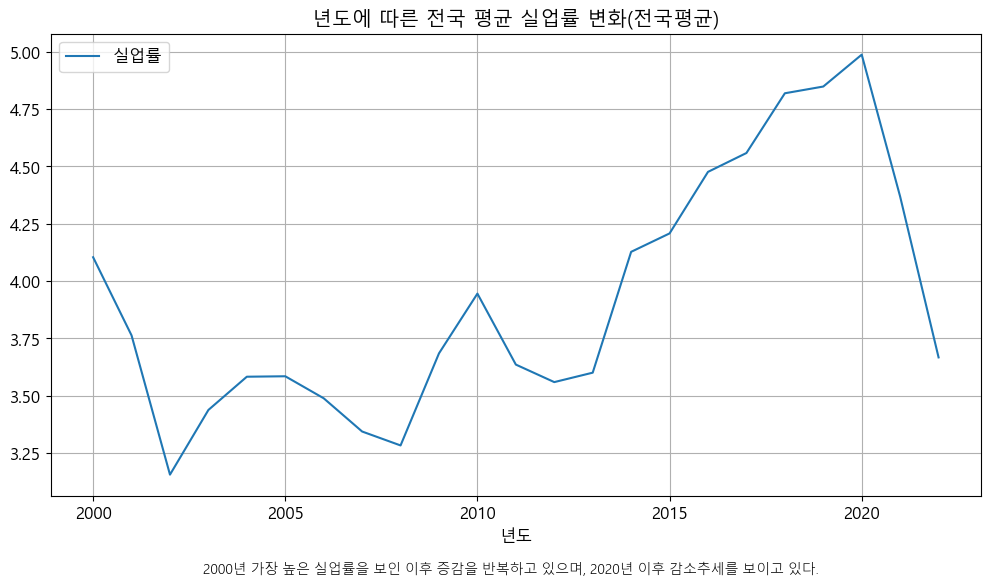

In [15]:
tdf.plot()
plt.title('년도에 따른 전국 평균 실업률 변화(전국평균)')
plt.grid()

txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51,0,txt,wrap=True,
            verticalalignment='top', horizontalalignment='center',
            fontdict={'size':10,'weight':'light'})
plt.show()
plt.close()

In [19]:
gdf = df2.filter(['년도','연령계층별','실업률']).groupby(['년도','연령계층별'], as_index=False).mean()
gdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


In [21]:
pdf = pivot_table(gdf, index='년도',
                  columns='연령계층별',
                  values='실업률')

pdf

연령계층별,15-29세,30-59세,60세이상
년도,,,
2000,7.735294,3.052941,1.523529
2001,7.435294,2.605882,1.247059
2002,6.470588,2.000000,0.994118
2003,7.223529,2.152941,0.935294
2004,7.552941,2.200000,0.994118
2005,7.135294,2.341176,1.276471
2006,7.200000,2.052941,1.211765
2007,6.729412,2.029412,1.270588
2008,6.541176,2.070588,1.235294


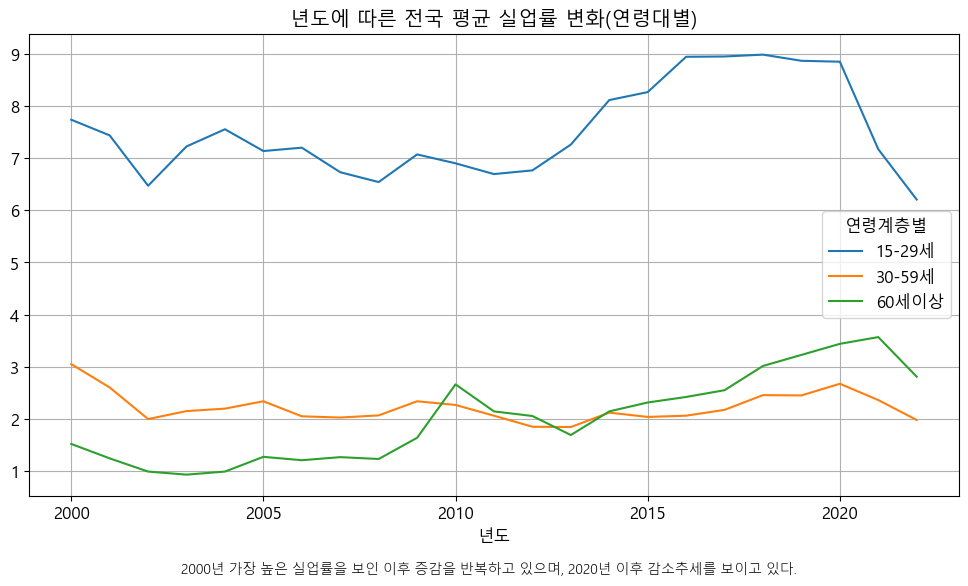

In [22]:
pdf.plot()
plt.title('년도에 따른 전국 평균 실업률 변화(연령대별)')
plt.grid()
txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51,0,txt,wrap=True,
            verticalalignment='top', horizontalalignment='center',
            fontdict={'size':10,'weight':'light'})
plt.show()
plt.close()


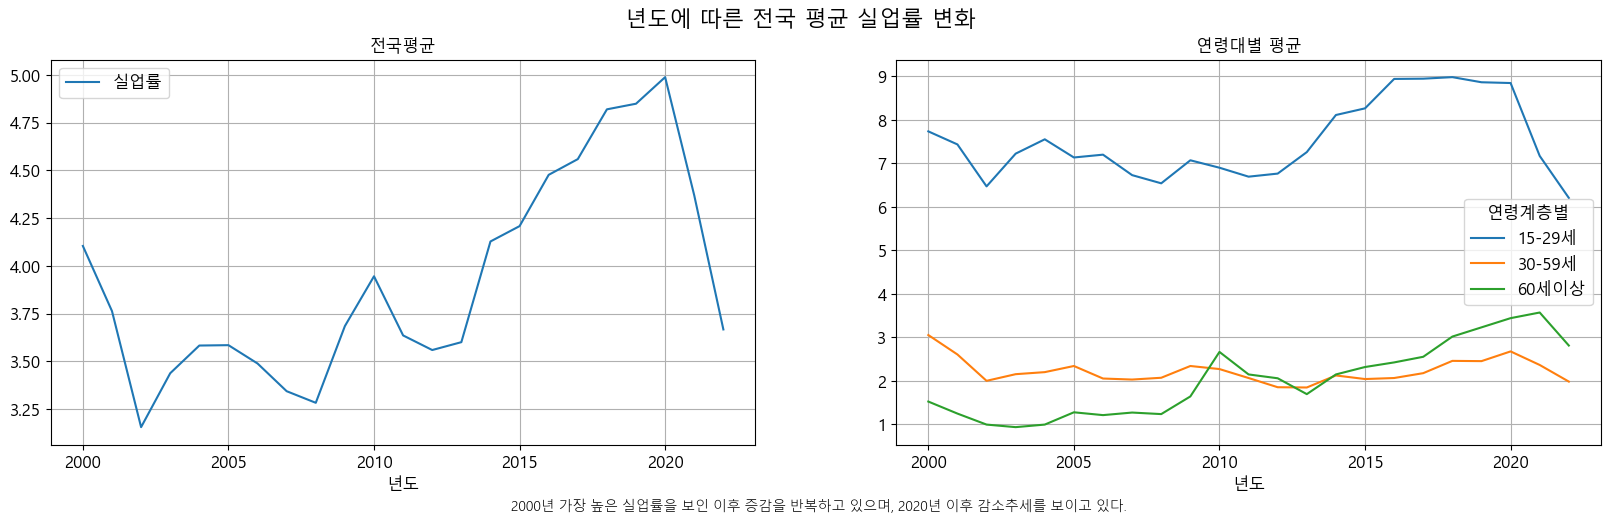

In [24]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
                               
fig.suptitle('년도에 따른 전국 평균 실업률 변화', fontsize=16,color='#000000')

tdf.plot(ax=ax1)
ax1.title.set_text('전국평균')
ax1.title.set_fontsize(12)
ax1.grid()

pdf.plot(ax=ax2)
ax2.title.set_text('연령대별 평균')
ax2.title.set_fontsize(12)
plt.grid()

txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51,0,txt,wrap=True,
            verticalalignment='top', horizontalalignment='center',
            fontdict={'size':10,'weight':'light'})
plt.show()
plt.close()